In [17]:
import pandas as pd

In [18]:
df=pd.read_csv("creditcard.csv")

In [19]:
df.shape

(284807, 31)

In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
fraudulent_amount = 0
number_of_fraudulent_transactions = 0;
for record in df.itertuples():
    if record.Class == True:
        fraudulent_amount += record.Amount
        number_of_fraudulent_transactions += 1
print('The total amount of fraudulent transactions: ', fraudulent_amount)    
print('The total number of fraudulent transactions: ', number_of_fraudulent_transactions)  
fraudulent_mean = fraudulent_amount / number_of_fraudulent_transactions
        
nonfraudulent_amount = 0
number_of_nonfraudulent_transactions = 0
for record in df.itertuples():
    if record.Class == False:
        nonfraudulent_amount += record.Amount
        number_of_nonfraudulent_transactions += 1
print('The total amount of non-fraudulent transactions: ', nonfraudulent_amount)    
print('The total number of non-fraudulent transactions: ', number_of_nonfraudulent_transactions)  
nonfraudulent_mean = nonfraudulent_amount / number_of_nonfraudulent_transactions


The total amount of fraudulent transactions:  60127.96999999997
The total number of fraudulent transactions:  492
The total amount of non-fraudulent transactions:  25102462.039983638
The total number of non-fraudulent transactions:  284315


<AxesSubplot: xlabel='Class', ylabel='count'>

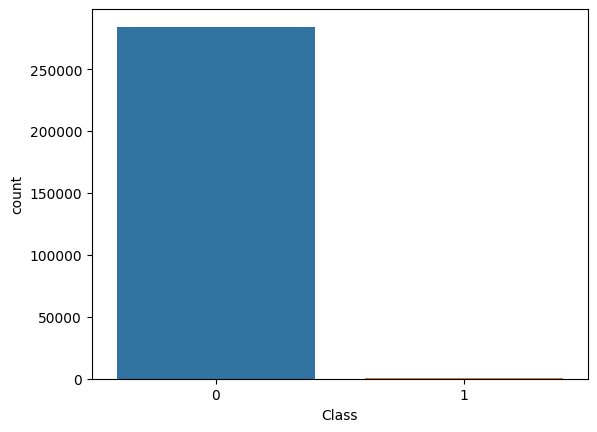

In [24]:
sns.countplot(x="Class",data=df)

<AxesSubplot: >

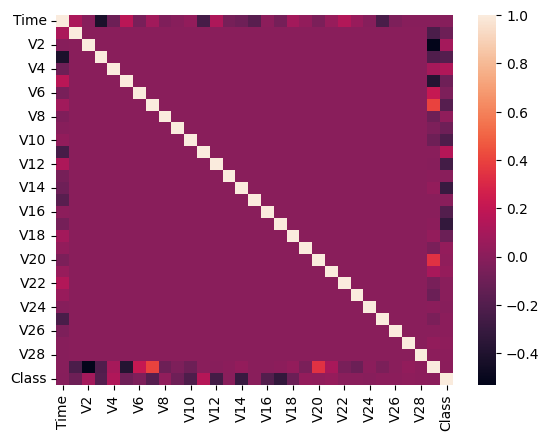

In [25]:
sns.heatmap(df.corr())

<AxesSubplot: >

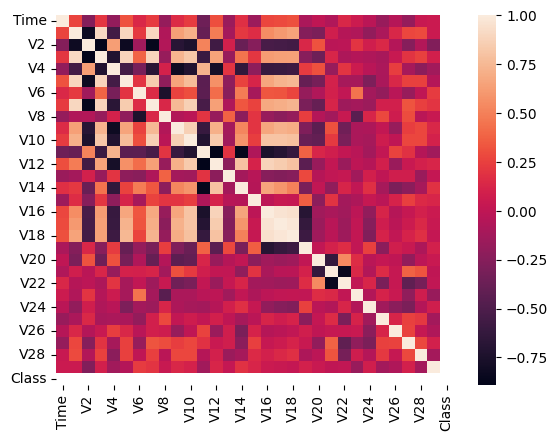

In [26]:
fraud_data=df[df['Class']==1]
sns.heatmap(fraud_data.corr())

<AxesSubplot: >

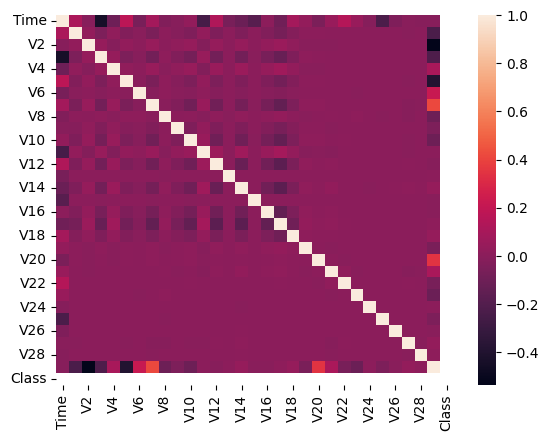

In [27]:
non_fraud_data=df[df['Class']==0]
sns.heatmap(non_fraud_data.corr())

In [28]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [30]:
X=df.drop("Class",axis=1)
y=df["Class"]

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Apply SMOTE to oversample the minority class
smote=SMOTE(random_state=42,k_neighbors=1)


#incase if null values were present handle missing values using
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [32]:
#here no null val so X_imputed=X
#data preprocessing
scaler = StandardScaler()
X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.fit_transform(X_test)
# do the same for test data. But here we will not apply the
# fit method only the transform method because we
# do not want our model to learn anything from the test data

In [33]:
X_train_resampled,y_train_resampled=smote.fit_resample(X_train_S,y_train)
# Print class distribution before and after oversampling
print("Before oversampling:")
print(y.value_counts())
print("After oversampling:")
print(y_train_resampled.value_counts())

Before oversampling:
0    284315
1       492
Name: Class, dtype: int64
After oversampling:
0    227451
1    227451
Name: Class, dtype: int64


In [34]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import KBinsDiscretizer

# Load the credit card fraud detection dataset


# Convert continuous features into discrete categories
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_discrete = est.fit_transform(df.drop(['Class'], axis=1))

# Perform chi-squared test
scores, pvalues = chi2(X_discrete, df['Class'])

# Sort features based on chi-squared scores
feature_scores = pd.DataFrame({'Feature': df.drop(['Class'], axis=1).columns, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select top 10 features
top_features = feature_scores['Feature'][:10].tolist()

print('Top 10 features selected using chi-squared test:')
print(top_features)

Top 10 features selected using chi-squared test:
['V11', 'V4', 'V14', 'V12', 'V17', 'V16', 'V18', 'V10', 'V3', 'V9']


C:\Users\hp\AppData\Local\Temp\ipykernel_20140\226576050.py:20: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_features = feature_scores['Feature'][:10].tolist()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Train and test on selected features
#X_train_selected = X_train_resampled[top_features]
#X_test_selected= X_test_S[top_features]

X_train_selected = X_train_resampled[:, [X_train.columns.get_loc(f) for f in top_features]]
X_test_selected = X_test_S[:, [X_test.columns.get_loc(f) for f in top_features]]

# Train logistic regression classifier
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_selected, y_train_resampled)

# Make predictions on test set
y_pred = logreg.predict(X_test_selected)

# Evaluate performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred) )
print('Recall: ',recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.9730346546820687
Precision: 0.05562422744128554
Recall:  0.9183673469387755
F1 Score:  0.1048951048951049
Confusion Matrix:
 [[55336  1528]
 [    8    90]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



In [36]:
import joblib

In [37]:
joblib.dump(logreg,"Model")

['Model']

In [38]:
model1=joblib.load("Model")

In [39]:
pred = model1.predict([[1,1,1,1,1,1,1,1,1,1]])

In [40]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
